# Classification

1. Naive Bayes: Titanic database 
2. KNN 

In [2]:
import pandas as pd
data=pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Drop the unnecessary columns
data = data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis='columns')
data['Sex']=data['Sex'].replace("male",1).replace("female",0)
data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [6]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [7]:
data=data.fillna(data["Age"].median())

In [8]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [9]:
data.describe()

,Survived,Pclass,Sex,Age,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,32.204208
std,0.486592,0.836071,0.477990,13.019697,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,7.910400
50%,0.000000,3.000000,1.000000,28.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200


In [10]:
correlationMatrix=data.corr()
correlationMatrix

,Survived,Pclass,Sex,Age,Fare
Survived,1.000000,-0.338481,-0.543351,-0.064910,0.257307
Pclass,-0.338481,1.000000,0.131900,-0.339898,-0.549500
Sex,-0.543351,0.131900,1.000000,0.081163,-0.182333
Age,-0.064910,-0.339898,0.081163,1.000000,0.096688
Fare,0.257307,-0.549500,-0.182333,0.096688,1.000000


In [11]:
# Droping Fare as correlated with Pclass, and Pclass strongly correlated to Survived

data=data.drop('Fare', axis=1)
data.head()

,Survived,Pclass,Sex,Age
0,0,3,1,22.0
1,1,1,0,38.0
2,1,3,0,26.0
3,1,1,0,35.0
4,0,3,1,35.0


/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


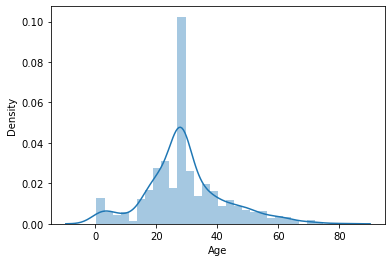

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.distplot(data["Age"])
plt.show()

/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


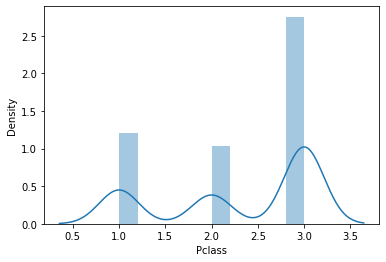

In [14]:
sns.distplot(data["Pclass"])
plt.show()

/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

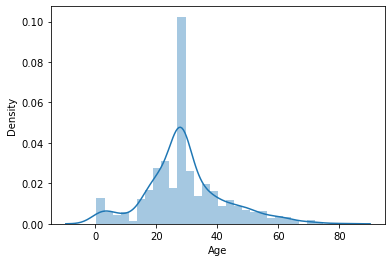

In [19]:
sns.distplot(data["Age"])

In [20]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets, in a 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.25, random_state=1)
X_train

,Pclass,Sex,Age
35,1,1,42.0
46,3,1,28.0
453,1,1,49.0
291,1,0,19.0
748,1,1,19.0
...,...,...,...
715,3,1,19.0
767,3,0,30.5
72,2,1,21.0
235,3,0,28.0


In [21]:
from sklearn.naive_bayes import GaussianNB
classifierG = GaussianNB()
classifierG.fit(X_train, y_train)


GaussianNB()

In [22]:
from sklearn.metrics import accuracy_score
pred = classifierG.predict(X_test)
acc = accuracy_score(y_test, pred)
acc

0.7802690582959642

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       128
           1       0.78      0.67      0.72        95

    accuracy                           0.78       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



# KNN

In [ ]:
# data.info()
Test=data[668:]
Train=data[:668]


In [ ]:
data['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [ ]:
Train

,Survived,Pclass,Sex,Age
0,0,3,1,22.0
1,1,1,0,38.0
2,1,3,0,26.0
3,1,1,0,35.0
4,0,3,1,35.0
...,...,...,...,...
663,0,3,1,36.0
664,1,3,1,20.0
665,0,2,1,32.0
666,0,2,1,25.0


In [ ]:
# Declaring the features and the label
features = data.drop('Survived', axis=1)
label = data['Survived']

In [ ]:
X_train=Test.drop('Survived', axis=1)
Y_train=Test['Survived']

 P(A|B) = P(B|A) * P(A) / P(B)
 

Create the probability table for features

In [ ]:
# Pclass vs Survived
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
set(data['Pclass'])
df = pd.DataFrame()

# for i in data['Pclass']==1:
#     if(i == True):
#         # df.append(data[i])
#         print(data.iloc[i])
#     # if(data['Pclass']==1 and data['Survived']==1):
#     #     df.append(data.loc[i])

# df

for i in range(667):
    if(data.iloc[i][1]==1 and data.iloc[i][0]==True):
        df.append(data.iloc[i])
        # print(data.iloc[i])

# data.iloc[0][1]

# data.iloc[0]
df

""
